In [38]:
import pandas as pd

# Load the CSV file
file_path = '6.18.2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
print(data)

             PLAYER     G     AB     R     H    2B   3B    HR   RBI    BB  \
0          JoeyBart  22.0   60.0   7.0  16.0   3.0  0.0   4.0  12.0   8.0   
1   AndrewMcCutchen  59.0  225.0  38.0  55.0   7.0  0.0  10.0  22.0  28.0   
2     BryanReynolds  72.0  292.0  29.0  79.0  19.0  2.0   9.0  39.0  29.0   
3        JasonDelay   3.0    7.0   0.0   1.0   1.0  0.0   0.0   4.0   2.0   
4      NickGonzales  33.0  126.0  17.0  38.0   7.0  1.0   5.0  25.0   5.0   
..              ...   ...    ...   ...   ...   ...  ...   ...   ...   ...   
91              NaN   NaN    NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
92              NaN   NaN    NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
93              NaN   NaN    NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
94              NaN   NaN    NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   
95            Image   NaN    NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   

      SO   SB   CS    AVG    OBP    SLG    OPS  
0   19.0  0.0  0.0  0.267 

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

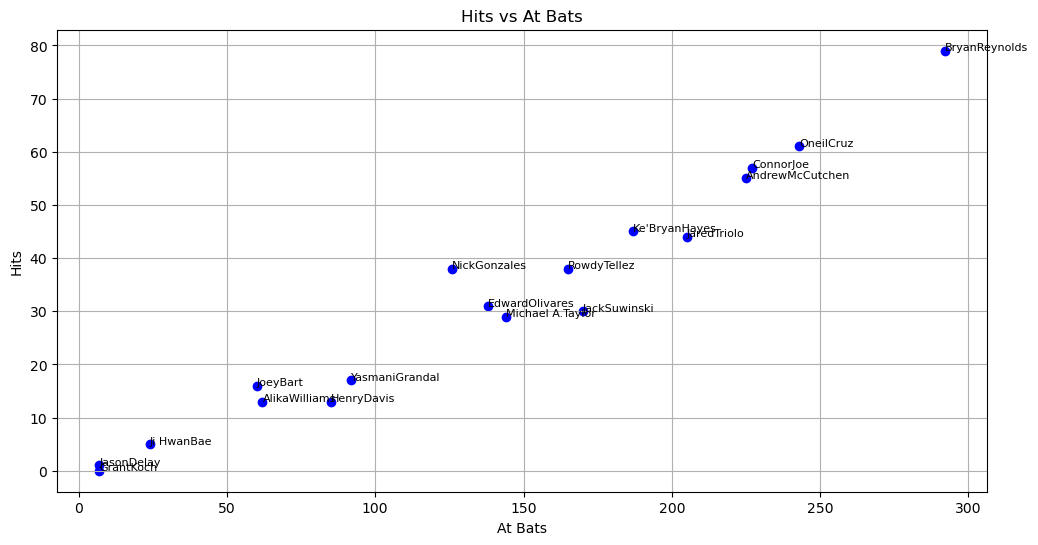

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = '6.18.2024.csv'
data = pd.read_csv(file_path)

# Ensure the PLAYER column is used as labels
data['PLAYER'] = data['PLAYER'].astype(str)

# Function to add trendline and annotations for equation and R^2
def add_trendline_and_annotations(x, y, xlabel, ylabel, title, color):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, c=color, label=ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Add data labels
    for i, player in enumerate(data['PLAYER']):
        plt.text(x.iloc[i], y.iloc[i], player, fontsize=8)
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    trendline = model.predict(x.values.reshape(-1, 1))
    
    # Plot trendline
    plt.plot(x, trendline, "r--")

    # Calculate R^2
    r_squared = model.score(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

    # Display equation and R^2
    equation = f"y = {model.coef_[0][0]:.3f}x + {model.intercept_[0]:.3f}"
    plt.text(min(x), max(y), f"{equation}\n$R^2$ = {r_squared:.3f}", fontsize=12, color='red')

    # Set axis format
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{val:.3f}'))

# Example usage of the function with specific columns
x_column = 'AB'  # At Bats
y_column = 'H'   # Hits

add_trendline_and_annotations(data[x_column], data[y_column], 'At Bats', 'Hits', 'Hits vs At Bats', 'blue')

plt.show()


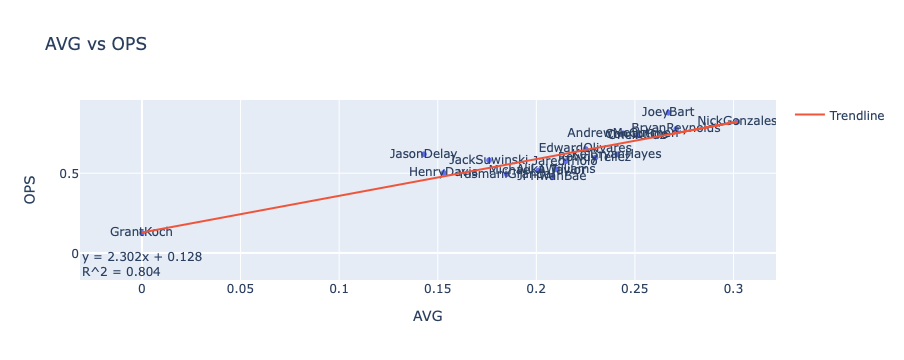

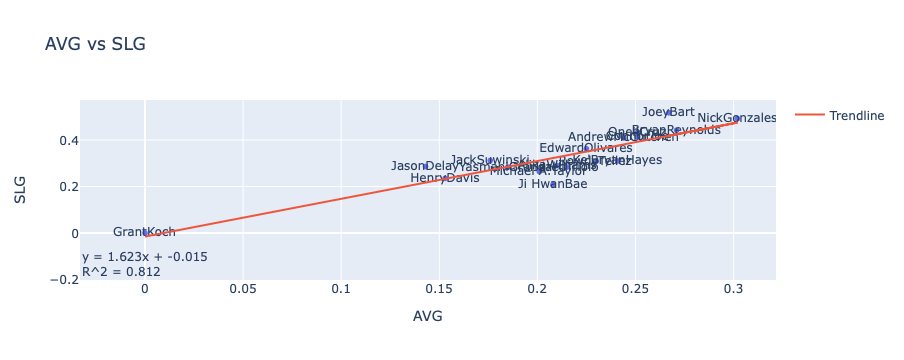

In [57]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = '6.18.2024.csv'
data = pd.read_csv(file_path)

# Ensure the PLAYER column is used as labels
data['PLAYER'] = data['PLAYER'].astype(str)

# Drop rows with NaN values in the relevant columns
data = data.dropna(subset=['AVG', 'OPS', 'SLG'])

def add_trendline_and_annotations(df, x_col, y_col, title):
    x = df[x_col]
    y = df[y_col]

    # Fit linear regression model
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))
    trendline = model.predict(x.values.reshape(-1, 1))
    
    # Calculate R^2
    r_squared = model.score(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

    # Create interactive scatter plot
    fig = px.scatter(df, x=x_col, y=y_col, text='PLAYER', title=title)
    
    # Add trendline
    fig.add_traces(go.Scatter(x=x, y=trendline.flatten(), mode='lines', name='Trendline'))

    # Display equation and R^2
    equation = f"y = {model.coef_[0][0]:.3f}x + {model.intercept_[0]:.3f}"
    annotation = f"{equation}<br>R^2 = {r_squared:.3f}"
    fig.add_annotation(x=min(x), y=min(y), text=annotation, showarrow=False, align='left', yshift=-30)

    fig.show()

# Perform regression analysis and plot for AVG vs OPS
add_trendline_and_annotations(data, 'AVG', 'OPS', 'AVG vs OPS')

# Perform regression analysis and plot for AVG vs SLG
add_trendline_and_annotations(data, 'AVG', 'SLG', 'AVG vs SLG')
